# Regressão Linear Multivariada



## Exercício 1

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?


2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?

### Importando as bibliotecas

In [70]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import timeit

### Criando as funções

In [60]:
# Criando métricas RSS e R²
def calc_rss(y,predicted):
    for i in predicted:
        return float(((i - y) ** 2).sum())
    
def calc_r2(y,predicted):
   
        return r2_score(predicted,y)

In [61]:
def max_abs_scaler(dados):
    'Função responsável por normalizar dados utilizando o MaxAbsScaler'

    # Instancia o MaxAbsScaler
    normalizacao_max = MaxAbsScaler()
    # Analisa os dados e prepara o padronizador
    dado_max = normalizacao_max.fit(dados)
    # Transforma os dados
    dado_max = normalizacao_max.transform(dados)
    
    return dado_max

In [62]:
def min_max_scaler(dados):
    'Função responsável por normalizar dados utilizando o MinMaxScaler'
    
    # Instancia o MinMaxScaler
    normalizacao_min = MinMaxScaler()
    # Analisa os dados e prepara o padronizador
    dado_min = normalizacao_min.fit(dados)
    # Transforma os dados
    dado_min = normalizacao_min.transform(dados)
    
    return dado_min

In [63]:
def standard_scaler(dados):
    'Função responsável por normalizar dados utilizando o Standard Scaler'
    # Instancia o StandardScaler
    normalizacao_std = StandardScaler()
    # Analisa os dados e prepara o padronizador
    dado_std = normalizacao_std.fit(dados)
    # Transforma os dados
    dado_std = normalizacao_std.transform(dados)

    return dado_std

In [76]:
def reg_linear_normalizado(dados, atributo_independente, atributo_dependente):
    'Função responsável por separar os dados, normalizar, realizar a regressão com'
    'descida do gradiente e plotar as informações'
    
    
    # Separando os valores preditores/independentes (X) e resposta/dependentes (y) 
    X = dados.loc[:,[atributo_independente]]
    y = dados.loc[:,[atributo_dependente]]
    
    # Normalizando os dados
    std = standard_scaler(X)
    

    # Instancia o regressor com descida do gradiente 
    reg_grad = SGDRegressor(max_iter=5000,alpha=0)
    
    # Inicio da verificação do tempo de treino
    start_time = timeit.default_timer()
    
    # Treinando o modelo
    reg_grad.fit(std,y.values.ravel())
    
    elapsed = timeit.default_timer() - start_time
    # Fim da verificação do tempo de treino
    
    print('Duração do treino:', elapsed)
    
    y_pred = reg_grad.predict(std)

    # Plotando dados
    plt.scatter(std, y,color='g')
    plt.plot(std, y_pred,color='k')
    plt.xlabel(atributo_independente)
    plt.ylabel(atributo_dependente)

    # Mostrando resultados através das métricas R² E RSS
    rss = calc_rss(y,y_pred)
    r2 = calc_r2(y,y_pred)
    print('Métrica RSS:', rss)
    print(f'Métrica R²: {r2}')

Duração do treino: 0.0004939999998896383
Métrica RSS: 728057894408.693
Métrica R²: 0.6310362517721821


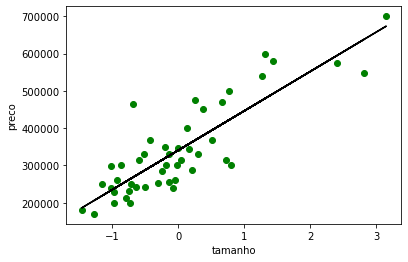

In [77]:
# Abrindo arquivo csv Portland
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

tamanho = reg_linear_normalizado(dados_por, 'tamanho', 'preco')


Duração do treino: 0.0005121000031067524
Métrica RSS: 8499.249600673465
Métrica R²: 0.36269367784931184


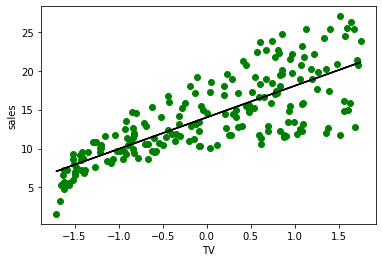

In [78]:
# Abrindo arquivo csv Advertising
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)

tv = reg_linear_normalizado(dados_adv, 'TV', 'sales')

Duração do treino: 0.0009938000002875924
Métrica RSS: 7127.806882066579
Métrica R²: -1.0155291187320583


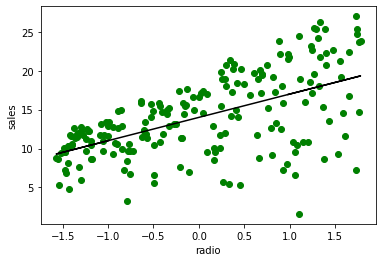

In [79]:
radio = reg_linear_normalizado(dados_adv, 'radio', 'sales')

### Respostas
1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

R: SIM.


2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?

R: Muito parecidos, não são iguais, mas próximos.

## Exercício 2


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


### Resolução Exercício 2

#### Conjunto de dados Advertising.csv

In [82]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X_Adv) E RESPOSTA/DEPENDENTES (Y_adv)
X_adv = dados_adv.loc[:,['TV', 'radio','newspaper']]
y_adv = dados_adv.loc[:,['sales']]

In [86]:
# Normalizando os dados
std = standard_scaler(X_adv)
# Instancia o regressor com descida do gradiente 
reg_grad = SGDRegressor(max_iter=5000,alpha=0)
# Inicio da verificação do tempo de treino
start_time = timeit.default_timer()
# Treinando o modelo
reg_grad.fit(std,y_adv.values.ravel())
elapsed = timeit.default_timer() - start_time
# Fim da verificação do tempo de treino
print('Duração do treino:', elapsed)
y_pred = reg_grad.predict(std)

Duração do treino: 0.0010271999999531545


In [87]:
# AVALIANDO O MODELO
rss = calc_rss(y_adv,y_pred)
r2 = calc_r2(y_adv,y_pred)
print(rss)
print(r2)

13869.042178816271
0.8850635446116569


#### Conjunto de dados Portland_housePrices.csv

In [88]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X) E RESPOSTA/DEPENDENTES (Y)
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

In [89]:
# Instancia o StandardScaler
normalizacao_std = StandardScaler()
# Analisa os dados e prepara o padronizador
dado_std = normalizacao_std.fit(X)
# Transforma os dados
dado_std = normalizacao_std.transform(X)

In [90]:
# Treinando o modelo
reg_grad = SGDRegressor(max_iter=5000,alpha=0)
reg_grad.fit(dado_std,y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

In [91]:
# Avaliando o modelo
rss = calc_rss(y,reg_grad.predict(dado_std))
r2 = calc_r2(y,reg_grad.predict(dado_std))
print(rss)
print(r2)

728175954316.3481
0.6313647907530966


### Respostas

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

R: Sim, é possivel.

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

R: Sim, o atributo QUARTOS e NEWSPAPER poderiam ser desconsiderados

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?

R: Sem contar o tempo para normalização dos dados o método com a descida de gradiente com todos os atributos é mais rápido do que o método dos minimos quadrados.

# Exercício 3

Realizar a análise da qualidade dos preditores utilizados no modelo construído.

1) Construir o plot de resíduos. Será que os resíduos estão aleatoriamente distribuídos ao redor de 0?

2) Calcular os valores p para os preditores utilizados no modelo de regressão. Utilize [esse link](https://stackoverflow.com/a/42677750) como referência. Utilizar essa técnica para selecionar variáveis preditivas. Comparar o desempenho do modelo construído a partir de variáveis preditivas com melhores valores p com um modelo que contêm todas as variáveis.


### Resolução Exercício 3.1 - Plot de residuos utilizando o conjunto de dados Portland_housePrices.csv

In [33]:
import numpy as np 

def cal_residuos(y, y_hat): 
    """FAZ O CÁLCULO DOS RESÍDUOS"""  
    #residuo = y - y_hat
    
    res = []
    for i in range(len(y)):

        res.append(float(y.iloc[i,0]) - y_hat[i])

        #print(y.iloc[i,0])
        #print(y_hat[i])
    residuos = np.array(res)
    return residuos

y_hat = reg_grad.predict(dado_std) # PREDIÇÃO

residuos = cal_residuos(y, y_hat)


Text(0, 0.5, 'Resíduo')

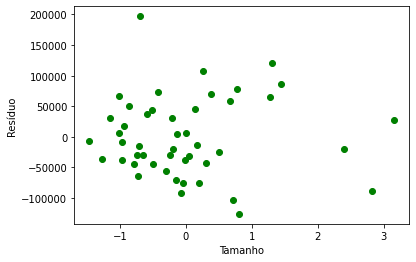

In [34]:
plt.scatter(dado_std, residuos,color='g')
#plt.plot(dado_std, reg_grad.predict(dado_std),color='k')
plt.xlabel('Tamanho')
plt.ylabel('Resíduo')

### Resolução Exercício 3.2 -  Calcular os valores p utilizando os dados Portland_housePrices.csv

In [97]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X) E RESPOSTA/DEPENDENTES (Y)
X = dados_por.loc[:,['tamanho', 'quartos']]
y = dados_por.loc[:,['preco']]


NORMALIZANDO OS DADOS DE ENTRADA COM StandardScaler

In [79]:
# Instancia o StandardScaler
normalizacao_std = StandardScaler()
# Analisa os dados e prepara o padronizador
dado_std = normalizacao_std.fit(X)
# Transforma os dados
dado_std = normalizacao_std.transform(X)


F-TEST ( encontrando os valores de p)

In [81]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(dado_std)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           2.43e-13
Time:                        12:04:02   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.404e+05   9637.239     35.323      0.0

### Resolução Exercício 3.2 -  Calcular os valores p utilizando os dados Advertising.csv

In [98]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X_adv) E RESPOSTA/DEPENDENTES (Y_adv)
X_adv = dados_adv.loc[:,['TV', 'radio','newspaper']]
y_adv = dados_adv.loc[:,['sales']]

NORMALIZANDO OS DADOS DE ENTRADA COM StandardScaler

In [95]:
# Instancia o StandardScaler
normalizacao_std = StandardScaler()
# Analisa os dados e prepara o padronizador
dado_std = normalizacao_std.fit(X_adv)
# Transforma os dados
dado_std = normalizacao_std.transform(X_adv)

F-TEST ( encontrando os valores de p)

In [96]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(dado_std)
est = sm.OLS(y_adv, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        12:06:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

### Respostas 

1) Construir o plot de resíduos. Será que os resíduos estão aleatoriamente distribuídos ao redor de 0?

R: Sim, com isso nosso modelo está bom. Pois se os resíduos estivessem distribuidos em algum padrão o modelo estaria com algumas informações explicativas vazadas para o erro supostamente aleatório.

2) Calcular os valores p para os preditores utilizados no modelo de regressão. Utilize [esse link](https://stackoverflow.com/a/42677750) como referência. Utilizar essa técnica para selecionar variáveis preditivas. Comparar o desempenho do modelo construído a partir de variáveis preditivas com melhores valores p com um modelo que contêm todas as variáveis.

R: Segundo a coluna P>|t| ( que é o valor p) o atributo x3(newspaper) do conjunto Advertising.csv tem pouca significância na resposta do modelo (y), então se treinar o modelo sem esse preditor não reduzirá o desempenho do modelo. E no conjunto Portland_housePrices.csv o atributo x2(quartos) também tem pouca significância.

# Exercício 4

Realizar o teste para descobrir multicolinearidade entre variáveis preditivas;

1) Utilizando [esse link](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) fazer o cáclulo do fator de inflação da variância (*Variance Inflation Factor - VIF*). Existe alguma evidência de multicolinearidade entre as variáveis preditivas?

### Resolução Exercício 4

#### Calculando o VIF do conjunto Advertising.csv

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X_adv)
X_adv = dados_adv.loc[:,['TV', 'radio','newspaper']]


In [137]:
# Calculando o valor VIF
VIF = [variance_inflation_factor(X_adv.values, i) for i in range(len(X_adv.columns))]
VIF

[2.486771835198193, 3.2854621001628947, 3.0552445106573853]

#### Calculando o VIF do conjunto Portland_housePrices.csv

In [139]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X)
X = dados_por.loc[:,['tamanho', 'quartos']]

In [140]:
# Calculando o valor VIF
VIF = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
VIF

[10.861137572528593, 10.861137572528593]

### Respostas

Sim, existe evidência de multicolinearidade entre as variaveis  "tamanho" e "quartos", pois o VIF é maior que 5